# Language Model
    Learning to predict probability of sequence of words
    
 ## Why language model  ??
 When we translate a language (or) answer a question (or) respond a chat (or) summarize a paragraph we get sequence of words 
 But these words must be in a specific order Eg "how are you" ==>"how=fine","Are==am","you==i"  but fine am i is not perfect
 so language modelling is important for NLP
 
 ### how Language modelliing deals ?
 P(the cat is on the wall) > P(cat on wall the is below)
 #####             language modlling assigns high probability to well formed sentence
 > rule based : prob(b/a) if ab are repeated many time subsequently its probability increases
 
 > neural models  :  more the number of same sentence its increases the probability of it in the weights for the subsequent word increases in  the neural network (EG if cat is present the weights for 'is' would be high bcz next word for 'is' would be given and optimisers tend to increase prob of "is" according to the loss )
 
 

Telling the above in technical terms
## Types of Language Models
There are primarily two types of Language Models:

### Statistical Language Models: 
These models use traditional statistical techniques like N-grams, Hidden Markov Models (HMM) and certain linguistic rules to learn the probability distribution of words
### Neural Language Models: 
These are new players in the NLP town and use different kinds of Neural Networks to model language

# An N-gram is a sequence of N tokens (or words)

If we have a good N-gram model, we can predict p(w | h) — what is the probability of seeing the word w given a history of previous words h — where the history contains n-1 words.

In [3]:
# importing the libraries
import numpy as np
import re

In [57]:
paragraph="we are boys we are girls we are having fun we are boys"

In [58]:
#since chain rule does heavy computation we will be using markov assumption
para = re.sub(r'[^\w\s]', '', paragraph) 
para=para.lower()
para_tokenised=list(para.split())
print(para_tokenised)

['we', 'are', 'boys', 'we', 'are', 'girls', 'we', 'are', 'having', 'fun', 'we', 'are', 'boys']


 lets initially do bigrams where n=2
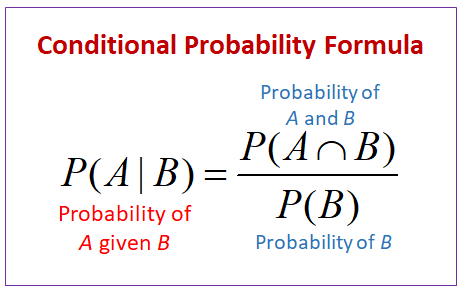 

## prob(vision/computer) =prob(no of "computer vision")/prob(no of "computer")
    
    

In [59]:
corpus=set(para_tokenised)
word2id={w:i for i,w in enumerate(corpus)}
id2word={i:w for i,w in enumerate(corpus)}
new_data=[]
for i in para_tokenised:
    new_data.append(word2id[i])
toy_corpus=new_data
print(toy_corpus)

[5, 4, 1, 5, 4, 0, 5, 4, 2, 3, 5, 4, 1]


In [ ]:
def check(s,t):
    s=list(s)
    l=list(t)
   
    assert(len(s)==len(t))
    for i,j in zip(s,t):
        if(i!=j):
            return False
    return True
        
def get_ngrams(b,a,n,corpus):
    #p(b/a)
    p_ab=0
   

    gram=b.copy()
    
    gram.append(a)
   
    assert(len(gram)==n)
    p_b=0
    for i in range(len(corpus)-(n-1)):
        if(check(corpus[i:i+n],gram)):
            p_ab+=1
        if(check(corpus[i:i+n-1],b)):
            p_b+=1
    return p_ab/p_b

his=input("enter sentence\t")
pred=input("enter pred sentece\t")
b=[]
for i in his.split():
    b.append(word2id[i])



a=word2id[pred]
n= len(b)+1
get_ngrams(b,a,n,toy_corpus)
        
        
# to predict ==> when history give each word of corpus as 'a' and get the highest probability
    